<a href="https://www.linkedin.com/in/amit-maindola-51801423/"><img src = "https://cdn-images-1.medium.com/max/1200/1*u16a0WbJeckSdi6kGD3gVA.jpeg" width = 400> </a>
<h1 align="center"><font size=5 color="DE5538">Matplotlib - Object Oriented API</font></h1>

## Introduction
In this Notebook I will be continuing the Data Visualization using matplotlib package using its Object Oriented API. The real advantage of this approach is when more than one figure is created or when there are more than one subplot in a figure.

A *matplotlib visualization* is a figure onto which is attached one or more axes. Each axes has a horizontal (x) axis and vertical (y) axis, and the data is encoded using color and glyphs such as markers (for example circles) or lines or polygons (called patches). The figure below annotates these parts of a visualization and was created by Nicolas P. Rougier using matplotlib.
![](anatomy.png)

### Import all the required libraries and dependencies

In [55]:
# Import numpy and Matplotlib
# this time we will use individual package than pylab
import numpy as np
print(f'Nump version : {np.__version__}')

import matplotlib
print(f'Matplotlib version : {matplotlib.__version__}')

%config InlineBackend.figure_format = 'retina' # change this to png if your plots are too small
%matplotlib inline
import matplotlib.pyplot as plt

Nump version : 1.16.4
Matplotlib version : 3.1.0


### What is backend ?   
Backends are the rendering engines matplotlib use to transform the Python code into pixels on the screen. Matplotlib supports many different static and interactive. **We told matplotlib to use the ipython inline backend when we typed %matplotlib inline.**.<br>
The job of the backend is to render the image from code to pixel and control how interactive the plot can be. 

In [58]:
matplotlib.get_backend()

'module://ipykernel.pylab.backend_inline'

## Figure and Axes

When we called **pyplot.plot()** there were a few things happening in the background
<li> matplotlib created a Figure instance, which is an object describing the plot window and its properties, and containing lists of all its elements<br>
<li> matplotlib created an Axes element within the figure. An axes can be thought of as a plotting window, where data can be arranged by x and y coordinates.<br>

Figure is like an empty sheet of paper or blan canvas on which we will draw all our plots, images and diagrams.

Now create our figure and axes:<br>
**plt.figure()** returns a figure instance which provides and empty canvas.<br>
**ax.plot()** will create a plot on the Axes

The x and y on a sin curve should have equal aspect because they are in the same units. To reflect this in our visualization, we use the .set_aspect function.

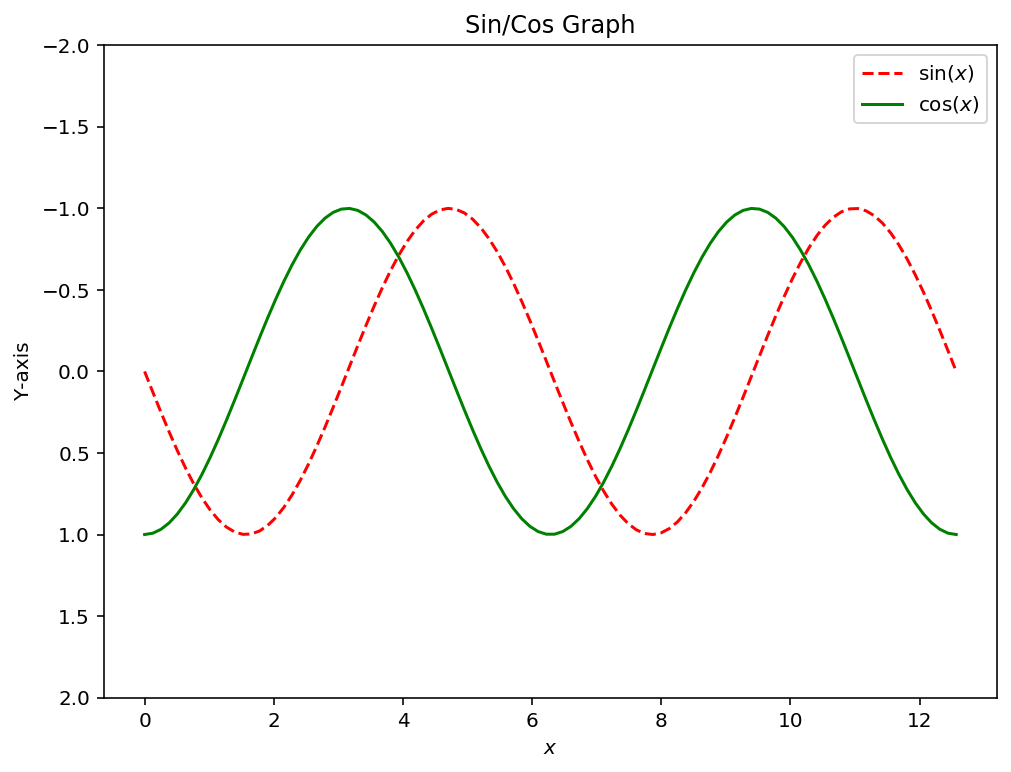

In [128]:
fig = plt.figure(figsize=(8,6)) # Add a new figure to the canvas
ax = fig.add_subplot(1, 1, 1) # specify rows, cols, number of axis

I = np.linspace(0, 4*np.pi, 100)

ax.plot(I,np.sin(I), 'r--')
ax.plot(I,np.cos(I), 'g-')
ax.set_title('Sin/Cos Graph')   # set the title
ax.set_xlabel(r'$x$')           # set the x-label
ax.set_ylabel('Y-axis')         # set the y-label
ax.set_ylim(2,-2)               # Limit the Y axes
ax.legend([r'$\sin(x)$', '$\cos(x)$'])     # Legend
# ax.set_aspect('equal')        # Aspect Ratio

We can chagne the colors of marker and lines by using the below parameters.
<li>color - changes the color of the line
<li>linewidth - changes the line width
<li>markersize - changes the size of the marker
<li>markerfacecolor - changes the face color of the marker
<li>markeredgecolor - changes the edge color of the marker
<li>drawstyle - The drawstyle determines how the points are connected.

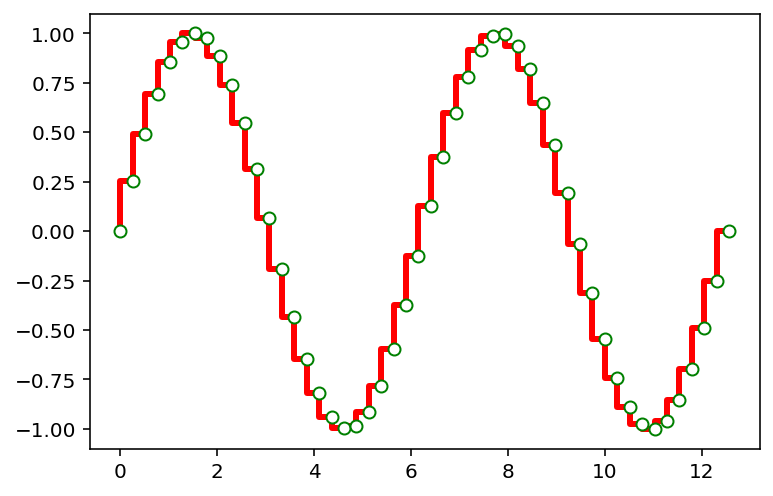

In [157]:
x = np.linspace(0, 4*np.pi, 50)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x, np.sin(x), color='r', marker='o'
        , markerfacecolor='w', markeredgecolor='g'
        , markersize=6, linewidth=3, drawstyle='steps-pre')

## Dataset
For this tutorial we are using the Kaggle Titanic dataset because it has a mix of quantitative and categorical variables and is well suited to data exploration. In this tutorial, we will explore the demographics of passengers on the Titanic.

In [158]:
import pandas as pd
df = pd.read_csv("http://bit.ly/tcsv19").dropna()
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

In [193]:
df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


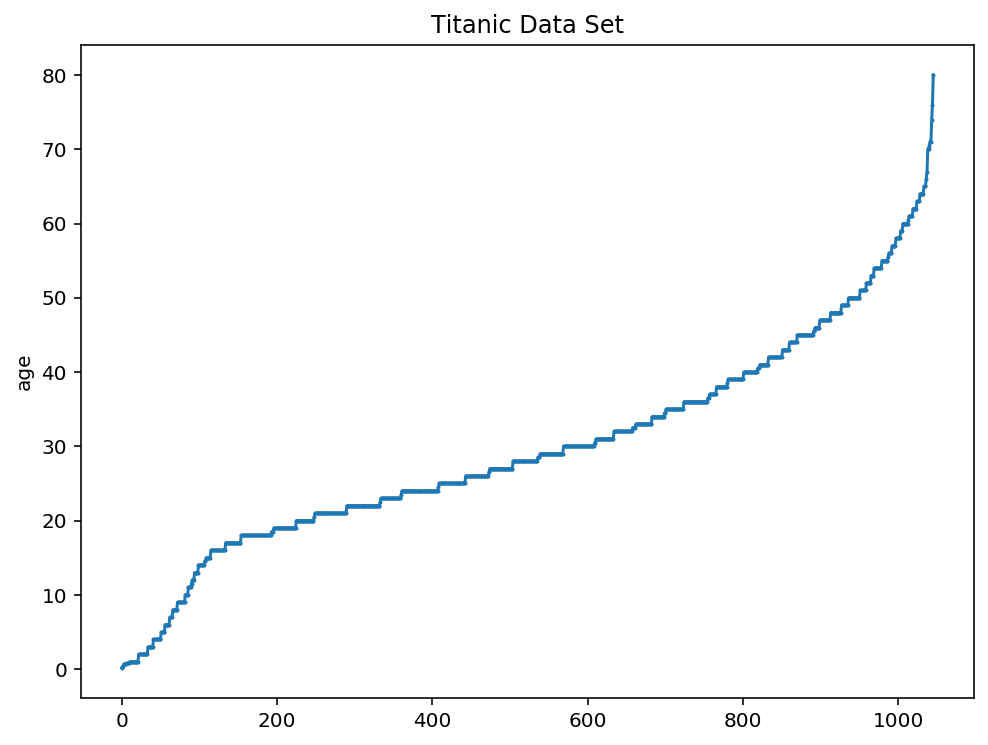

In [89]:
fig, ax = plt.subplots(figsize=(8,6))
# assigning value to _ means we don't care the return type, it is just to supress the Object type displayed in Notebook
_ = ax.plot(np.sort(df['age']), marker='o', markersize=1)
_ = ax.set_title("Titanic Data Set")
_ = ax.set_ylabel("age")

Instead of displaying ages in the interval of Decades, let's display them in Demographic groups.<br>
<li>Children: 0–14 years
<li>Youth: 15–24 years
<li>Adult: 25–54 years
<li>Older Adult: 55–64 years
<li>Senior: 65 years and over
    <br><br>
Ticks can be customized in two ways:<br><br>
Locators : where the tick is<br>
Formatters: where the tick looks like<br>

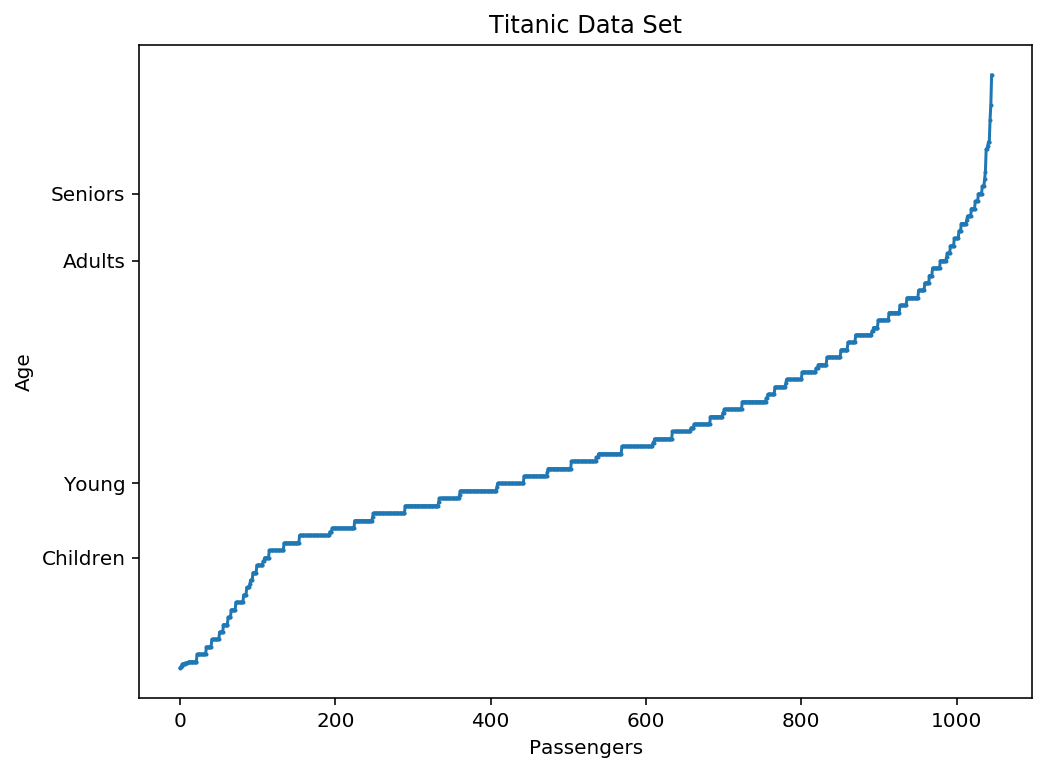

In [87]:
fig, ax = plt.subplots(figsize=(8,6))
_ = ax.plot(np.sort(df['age']), marker='o', markersize=1)
_ = ax.set_title("Titanic Data Set")
_ = ax.set_ylabel("Age")
_ = ax.set_xlabel("Passengers", )
_ = ax.set_yticks([15, 25, 55, 64])
_ = ax.set_yticklabels(['Children', 'Young', 'Adults', 'Seniors'])

Now let's create a Plot on the Fares
<li>First Class Suite- £870
<li>First Class Berth- £30 
<li>Second Class- £12
<li>Third Class- £3 to £8

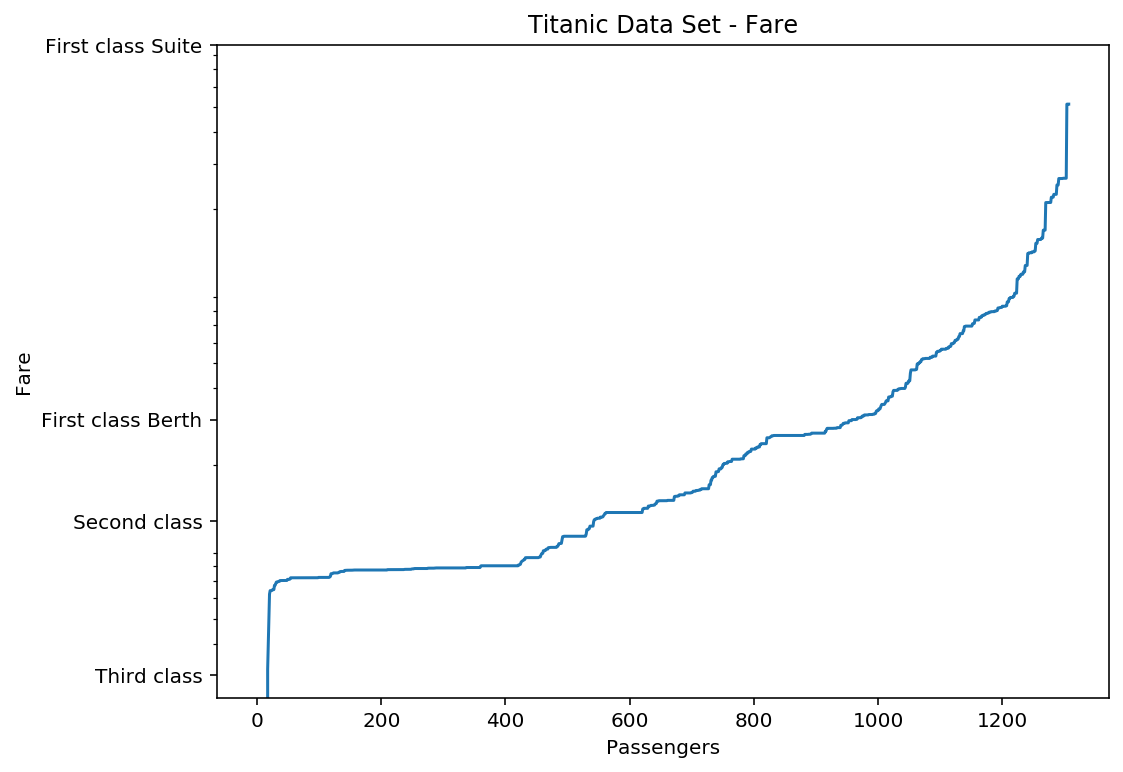

In [93]:
fig, ax = plt.subplots(figsize=(8,6))
_ = ax.plot(np.sort(df.fare))
_ = ax.set_title('Titanic Data Set - Fare')
_ = ax.set_ylabel("Fare")
_ = ax.set_xlabel("Passengers")
_ = ax.set_yscale('log')        # Convert what follows on the y to log
_ = ax.set_yticks([3,12,30,870])
_ = ax.set_yticklabels(["Third class", "Second class", "First class Berth", "First class Suite"])

## Multiple Axes
Now let's put two axes together on one figure, using subplots with the ncols kwarg to create a figure with two axes side by side. We can use Figure method **suptitle** to put a figure level title on the plot.<br>
If you want the axes to be one under the other, you can use plt.subplots(nrows=2)<br>

Constrained layout is matplotlib automagic that tries to place all the elements of the image on the page such that they don't overlap but the image still has breathing room and the users instructions are respected. It is especially useful when plotting multiple images.<br><br>
Here, we want one image to be much thinner than the second, so we will pass the width_ratios argument to gridspec_kw. Here, we say we want the second plot to be 3 times wider than the first.

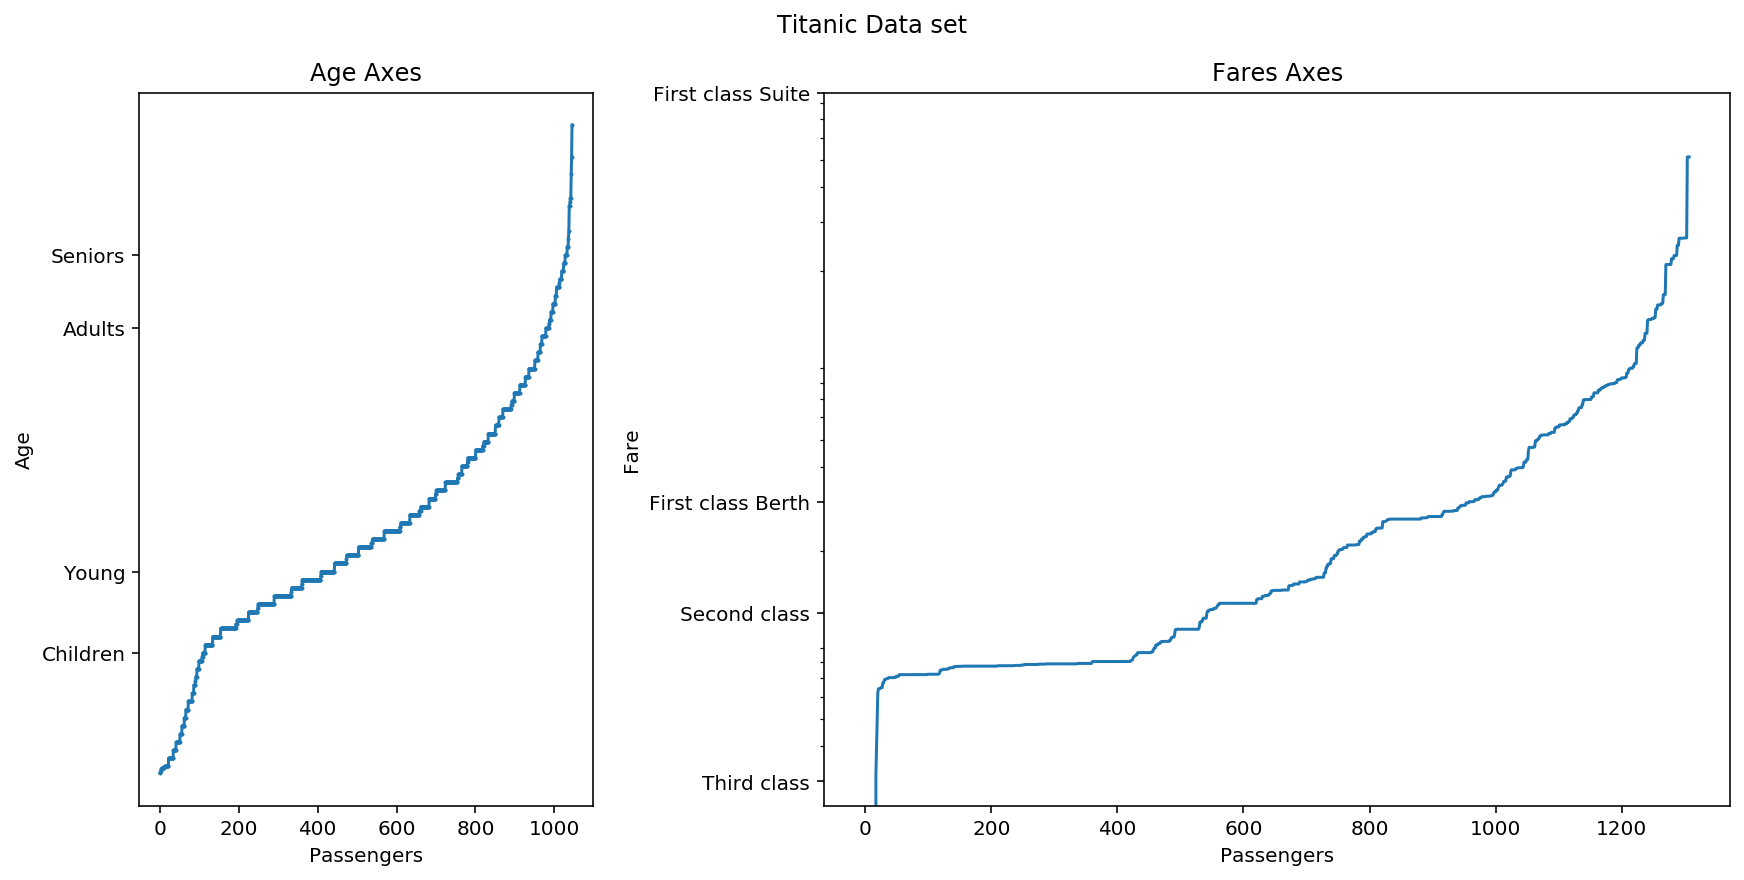

In [122]:
fig, (ax1, ax2) = plt.subplots(figsize=(12,6), ncols=2, 
                               constrained_layout=True,
                              gridspec_kw={'width_ratios':[1,2]}
                              )
fig.suptitle("Titanic Data set")
# Add elements to Axes 1
_ = ax1.plot(np.sort(df['age']), marker='o', markersize=1)
_ = ax1.set_title("Age Axes")
_ = ax1.set_ylabel("Age")
_ = ax1.set_xlabel("Passengers", )
_ = ax1.set_yticks([15, 25, 55, 64])
_ = ax1.set_yticklabels(['Children', 'Young', 'Adults', 'Seniors'])
# Add elements to Axes 2
_ = ax2.plot(np.sort(df.fare))
_ = ax2.set_title("Fares Axes")
_ = ax2.set_ylabel("Fare")
_ = ax2.set_xlabel("Passengers")
_ = ax2.set_yscale('log')        # Convert what follows on the y to log
_ = ax2.set_yticks([3,12,30,870])
_ = ax2.set_yticklabels(["Third class", "Second class", "First class Berth", "First class Suite"])

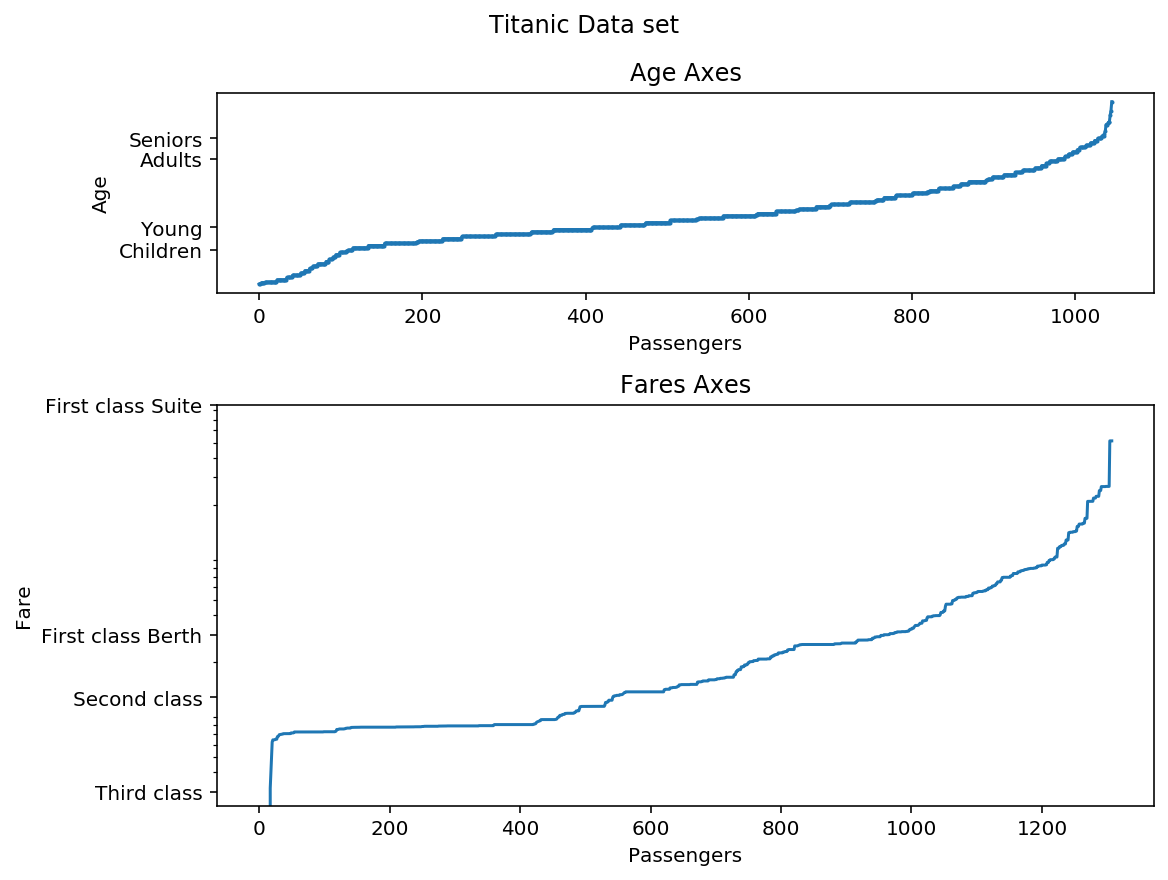

In [129]:
fig, (ax1, ax2) = plt.subplots(figsize=(8,6), nrows=2, 
                               constrained_layout=True,
                              gridspec_kw={'height_ratios':[1,2]}
                              )
fig.suptitle("Titanic Data set")
# Add elements to Axes 1
_ = ax1.plot(np.sort(df['age']), marker='o', markersize=1, markerfacecolor='white')
_ = ax1.set_title("Age Axes")
_ = ax1.set_ylabel("Age")
_ = ax1.set_xlabel("Passengers", )
_ = ax1.set_yticks([15, 25, 55, 64])
_ = ax1.set_yticklabels(['Children', 'Young', 'Adults', 'Seniors'])
# Add elements to Axes 2
_ = ax2.plot(np.sort(df.fare))
_ = ax2.set_title("Fares Axes")
_ = ax2.set_ylabel("Fare")
_ = ax2.set_xlabel("Passengers")
_ = ax2.set_yscale('log')        # Convert what follows on the y to log
_ = ax2.set_yticks([3,12,30,870])
_ = ax2.set_yticklabels(["Third class", "Second class", "First class Berth", "First class Suite"])

## Scattered Data
Let's create a Scatter plot comparing age and fare to see if any corelation exits.<Br><br>

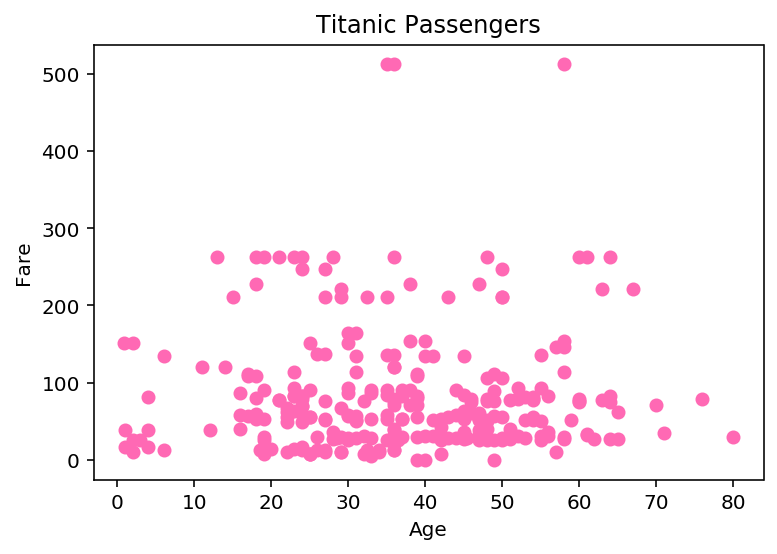

In [178]:
fig, ax = plt.subplots()
_ = ax.scatter('age', 'fare', data=df, color='hotpink')
_ = ax.set(xlabel='Age', ylabel='Fare', title='Titanic Passengers')

### Customize colormap
Is there a difference in age and fare between people who survived and people who didn't? Here we will color the dots based on the survived column (remember 0 is dead and 1 is alive) using the c keyword arg. Setting each label individually using the .set_ methods can get tedious, so there's a meta-set function you can use to set all the labels in one shot.<Br>
    
Here we will color the dots based on the survived column (remember 0 is dead and 1 is alive) using the c keyword arg. . The colors are yellow and purple because they are from the default matplotlib colormap Viridis. The viridis colormap is designed for quantitative datasets and survived is categorical. Instead of using the default, let's use a categorical colormap to make things prettier. You can find a full list of colormaps at the [colormap reference](https://matplotlib.org/examples/color/colormaps_reference.html) .

we can make use of the fairly new scatter legend functionality to generate a label based on the colors. Here we assign the output of ax.scatter to the sc variable because will need to use the sc object to generate the legend.

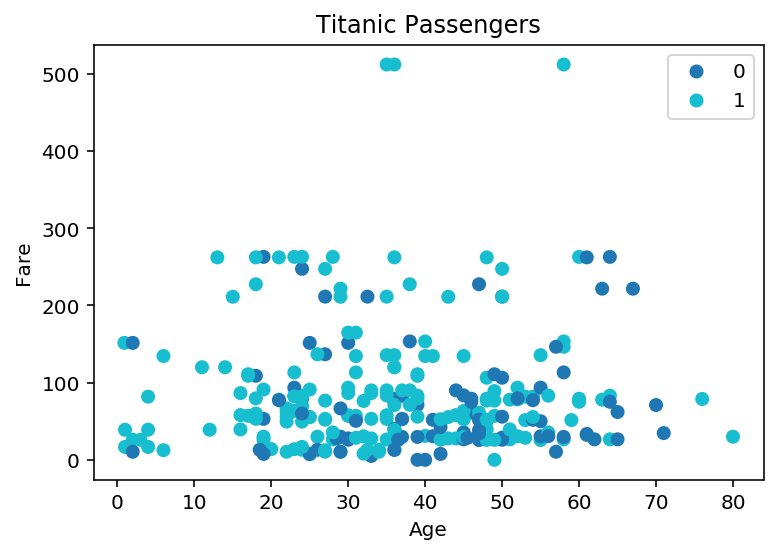

In [179]:
fig, ax = plt.subplots()
sc = ax.scatter('age', 'fare', data=df, c='survived', cmap='tab10')
_ = ax.set(xlabel='Age', ylabel='Fare', title='Titanic Passengers')
_ = ax.legend(*sc.legend_elements()) # Splat operator(*) will split the List to individual elements

### Custom lables and Colormaps
We can also create a listed colormap so we can set the colors manually. You can refer the list of colors [Here](https://matplotlib.org/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py)

sc.legend_elements() returns two lists:

<li>handles: plot objects displayed in the legend (in this case the scatter points)<br>
<li>labels: the label attached to each handle<br>

In this case, labels are 0 and 1 because that's what was passed in as the color, so we overwrite the default labels with our custom ones.

We can set transparency using the **alpha** parameter and size of bubble using *s* parameter.

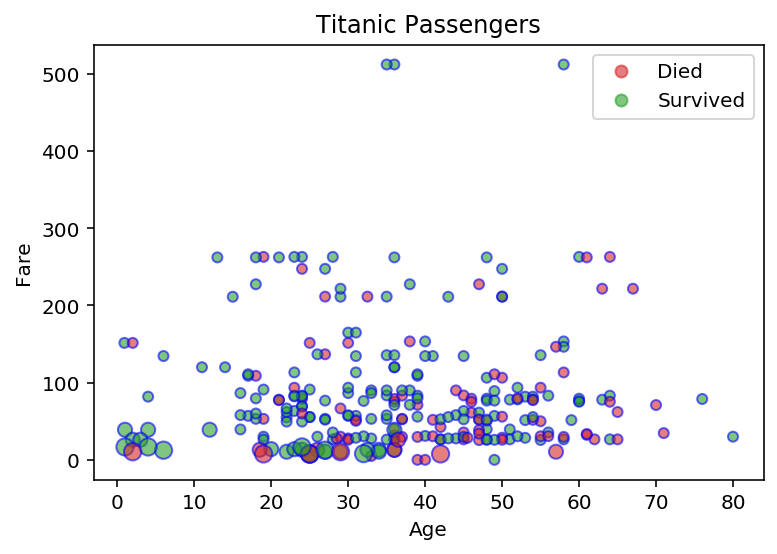

In [192]:
import matplotlib.colors as mcolors
cmap = mcolors.ListedColormap(['tab:red','tab:green'])
fig, ax = plt.subplots()
sc = ax.scatter('age', 'fare', data=df, c='survived', cmap=cmap, alpha=0.6, edgecolor='b', s=df['pclass']*25)
_ = ax.set(xlabel='Age', ylabel='Fare', title='Titanic Passengers')
_ = ax.legend(handles = sc.legend_elements()[0], labels=['Died', 'Survived'])

### Visual overload markers
Let's see how sex factors into survival, we will create two scatter plots here.

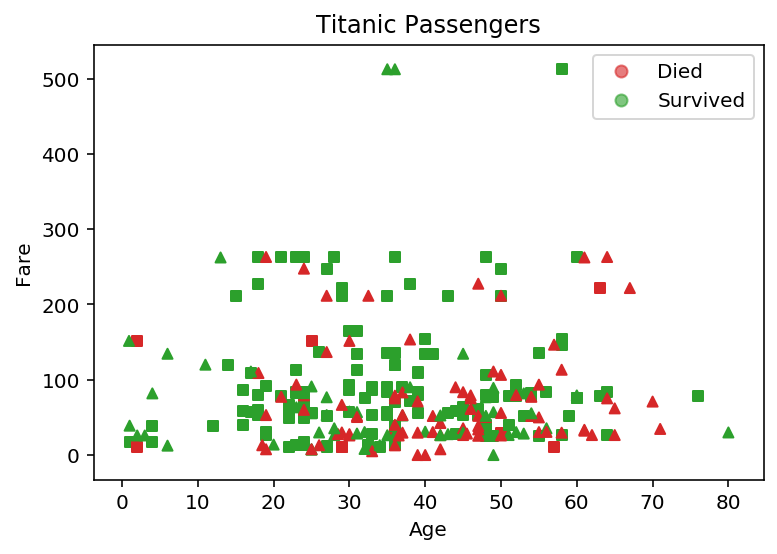

In [202]:
fig, ax = plt.subplots()
sc_f = ax.scatter('age', 'fare', data=df[df['sex'].str.match('female')], c='survived'
                , cmap=cmap, s=df['pclass']*25, marker='s')

sc_m = ax.scatter('age', 'fare', data=df[df['sex'].str.match('male')], c='survived'
                , cmap=cmap, s=df['pclass']*25, marker='^')
_ = ax.set(xlabel='Age', ylabel='Fare', title='Titanic Passengers')
_ = ax.legend(handles = sc.legend_elements()[0], labels=['Died', 'Survived'])

Let's split the scatter plot for each sex.

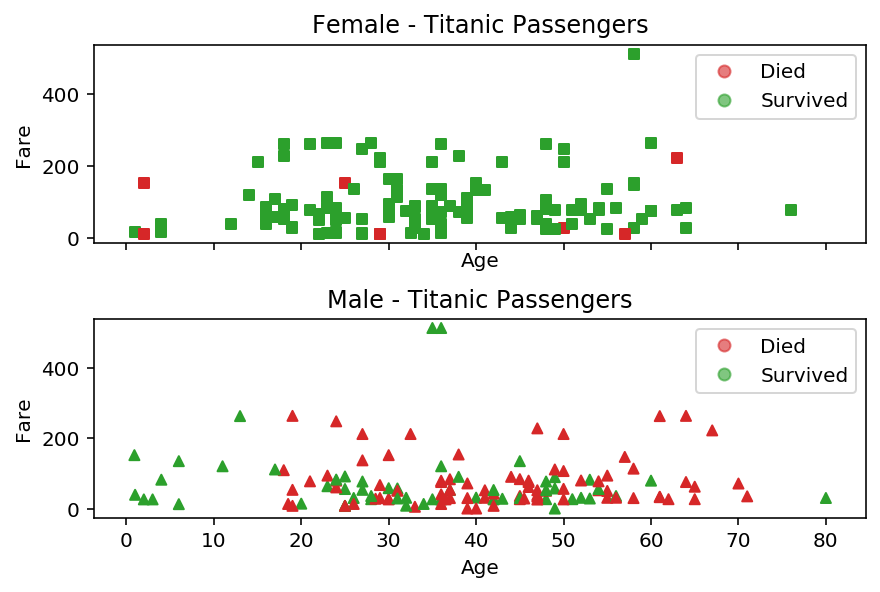

In [211]:
# %matplotlib widget
fig, axes = plt.subplots(2,1, sharex=True, constrained_layout=True)
sc_f = axes[0].scatter('age', 'fare', data=df[df['sex'].str.match('female')], c='survived'
                , cmap=cmap, s=df['pclass']*25, marker='s')

sc_m = axes[1].scatter('age', 'fare', data=df[df['sex'].str.match('male')], c='survived'
                , cmap=cmap, s=df['pclass']*25, marker='^')

_ = axes[0].set(xlabel='Age', ylabel='Fare', title='Female - Titanic Passengers')
_ = axes[0].legend(handles = sc.legend_elements()[0], labels=['Died', 'Survived'])

_ = axes[1].set(xlabel='Age', ylabel='Fare', title='Male - Titanic Passengers')
_ = axes[1].legend(handles = sc.legend_elements()[0], labels=['Died', 'Survived'])